## Import Libraries

In [1]:
import matplotlib.pyplot as plt
from numpy import sin, cos, sqrt, pi, linspace, arange, deg2rad
from numpy import rad2deg, array, arcsin, arccos,sort, argsort, argwhere, argmin, argmax
from numpy import interp, concatenate, zeros,logspace, isnan, full
from scipy.spatial import distance
import warnings
from mpl_toolkits import mplot3d
from numpy import linalg as LA
warnings.simplefilter('ignore')

def sec(x):
    return 1/cos(x)
def tan(x):
    return sin(x)/cos(x)

## Initialize Parameters 

A :  [1.0e-03 0.0e+00 4.5e+00]
B :  [ 1.00000000e-03 -9.61786516e-18  0.00000000e+00]
Theta: 0.0
(0, 0, 0) 
 (-0.9249999999999996, 1.6021469970012117, 0) 
 (-0.9250000000000008, -1.602146997001211, 0) 
 (1.85, 0.0, 0)


(-4.014995393301708, 4.014999780633414, -4.014989580089784, 4.014998354750561)

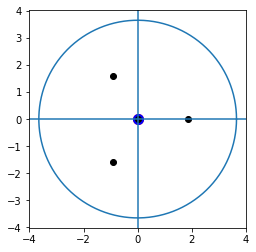

In [2]:
n      = 1.33 #-------------------------------------------- Refractive index of medium
c      = 299792458/n #------------------------------------- Speed of light in medium
R      = 7.3/2 #------------------------------------------- Radius of tank
v      = n * c #------------------------------------------- Particle Speed
h      = 4.5
times  = linspace(1e-11,1e-7,100000)
c1     = (0, 0, 0)  #------------------------------------ Central    PMT number 1 
c2     = (1.85*cos(2*pi/3) , 1.85*sin(2*pi/3), 0) #------ Non-Radial PMT number 2
c3     = (1.85*cos(4*pi/3) , 1.85*sin(4*pi/3), 0) #------ Non-Radial PMT number 3
c4     = (1.85*cos(0     ) , 1.85*sin(0     ), 0) #------ Radial     PMT number 4

x1,y1  = (0.001,0) #----------------------------------------- Coordinates of particle at top tanker lid      #------PARAM
theta  = deg2rad(180)   #----------------------------------------- Zenith  varies from 90 to 180                    #------PARAM
phi    = deg2rad(1)   #----------------------------------------- Azimuth varies from  0 to 360                    #------PARAM
x2     = x1 + h * tan(theta) * cos(phi) # ------------------- Calculate bottom x coordinate
y2     = y1 + h * tan(theta) * sin(phi) #-------------------- Calculate bottom y coordinate

A      = array([x1,y1,h]) #---------------- Entry Point of muon
B      = array([x2,y2,0]) #---------------- Exit point of muon
AB     = B-A #------------------------------------------------ Displacement vector of muon
nAB    = LA.norm(AB) #---------------------------------------- Path length traveled by muon
den    = c*c - v*v
theta2 = pi - theta
del theta
theta     = theta2
print('A : ', A) ; print('B : ', B) ;print('Theta:',rad2deg(theta)); print(c1,'\n',c2,'\n',c3,'\n',c4)
angs   = linspace(0,6.28,1000)
xs,ys  = R*cos(angs), R*sin(angs)
#Plot cylinder transverse cross-section
plt.plot(xs,ys)
plt.scatter(A[0],A[1],c='r',s=100) ; plt.scatter(B[0],B[1],c='b',s=100);
plt.scatter(c1[0],c1[1],c='k'); plt.scatter(c2[0],c2[1],c='k');
plt.scatter(c3[0],c3[1],c='k'); plt.scatter(c4[0],c4[1],c='k')
plt.axhline(0)
plt.axvline(0)
plt.axis('scaled')

In [3]:
def entry_brightness(L,c,v,alpha,den):
    tt     = L/c
    aterm  = (c*c*tt*v-L*v*v*cos(alpha))
    bterm  = (v*v*( -L*L*v*v + c*c*L*L + c*c*tt*tt*v*v - 2*c*c*L*tt*v*cos(alpha) + L*L*v*v*cos(alpha)**2))
    xp     = (aterm + sqrt(bterm)) / den
    zp     = (nAB-xp)*cos(theta)
    cterm  = (c*c*v)
    dterm  = (c*c*v*v*v*(tt*v-L*cos(alpha)))
    vp     = (cterm + (dterm/sqrt(bterm))) / den
    rp     = xp/nAB
    Xp     = array([ (1-rp)*A[0] + rp*B[0] , (1-rp)*A[1] + rp*B[1] , (1-rp)*A[2]+rp*B[2]])
    kp     = LA.norm(D-Xp) #sqrt( L*L + xp*xp - 2*L*xp*cos(alpha) )
    betap  = alpha #arccos(sum((D-Xp)*(B-Xp))/(kp*LA.norm(B-Xp))) #pi - arccos( (xp*xp + kp*kp - L*L) / (2*xp*kp) )  
    vtp    = vp*sin(betap)
    omegap = vtp / kp
    bp     = abs(omegap/(kp**2))
    return bp

def plus_t_vs_x (a, b, color, label):
    plt.plot(a, b, c=color, ls='-' , lw=2.5, label=label)
def minus_t_vs_x(a, b, color, label):
    plt.plot(a, b, c=color, ls=(0,(5,5)), lw=2.5, label=label)
def both_t_vs_x (a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls=(0,(5,5)), lw=2.5)
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'image height $z_{\pm}$ from ground (in meters)', fontsize=18)
    plt.axhline(zc, c='k', ls=':')
    if detector!=1:
        plt.text(19.5,zc+0.07, r'$z_C$ = {}'.format(round(zc,2)), fontsize=18)
    #else:
    #    plt.text(27,zc-0.22, r'$z_C$ = {}'.format(round(zc,2)), fontsize=18)
    
def plus_t_vs_b (a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_t_vs_b(a, b, color, label):
    plt.plot(a, b, c=color, ls=(0,(5,3)), lw=2.5, label=label)
def both_t_vs_b (a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls=(0,(5,3)), lw=2.5)
    plt.axhline(1,c='k',ls=':')
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'relative brightness ($b/b_{entry}$)', fontsize=18) 
    plt.yscale('log')
    plt.yticks(logspace(-1,10,12,base=10))
    
def plus_t_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_t_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls=(0,(5,4)), lw=2.5, label=label)
def both_t_vs_ang(a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls=(0,(5,4)), lw=2.5)
    plt.axhline(gammac, c='k', ls=':')
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'angular locations $\phi_{\pm}\;(in\;degrees)$',fontsize=18)
    #if detector==4:
    plt.text(26,gammac+1, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    #else:#if detector==1:
    #    plt.text(30,gammac+1, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    
def plus_b_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_b_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls=(0,(5,4)), lw=2.5, label=label)
def both_b_vs_ang(a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls=(0,(5,4)), lw=2.5)
    plt.axvline(gammac, c='k', ls=':')
    plt.axhline(1,c='k',ls=':')
    plt.xlabel(r'angular locations $\phi_{\pm}\;(in\;degrees)$',fontsize=18)
    plt.ylabel(r'relative brightness ($b/b_{entry}$)', fontsize=18) 
    plt.yscale('log')
    #if detector==1:
    plt.text(gammac+0.5, 1000, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    #elif detector==4:
    #    plt.text(gammac+0.5, 0.03, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    #elif detector==3:
    #    plt.text(gammac+0.5, 0.01, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)

In [4]:
%matplotlib
plt.figure()

plotme    = 't vs b'
#plotme    = 't vs x'
#plotme    = 't vs ang'
#plotme    = 'b vs ang'

detector_coordinates = [c1,c2]
colors               = ['k','r']
detectors            = [1,2]
labels               = ['Central Detector', 'Surrounding Detectors']

for D, color, detector, mylabel in zip(detector_coordinates, colors, detectors, labels):

    print("==============================================")
    print("Detector ", detector)
    
    AD    = D - A
    BD    = D - B
    L     = LA.norm(AD)
    alpha = arccos((sum(AD*AB))/(L*nAB)) # OR use alpha1 = arccos( (L*L+x*x-k*k)/(2*x*L) )
    xc    = L*cos(alpha) - (c*L*sin(alpha))/sqrt(-den)
    zc    = (nAB-xc)*cos(theta)
    print('ZC: ',round(zc,3), " m")

    T,XP,XM,ZP,ZM,BP,BM,GAMMAP,GAMMAM = [],[],[],[],[],[],[],[],[]
    
    for iii,t in enumerate(times):

        x      = v*t
        ratio  = x/nAB
        X      = array([ (1-ratio)*A[0] + ratio*B[0] , (1-ratio)*A[1] + ratio*B[1] , (1-ratio)*A[2]+ratio*B[2]   ])
        AX,DX  = X - A, X-D
        k      = LA.norm(DX)
        t1,t2  = t, k/c
        tt     = t1 + t2
        
        aterm  = (c*c*tt*v-L*v*v*cos(alpha))
        bterm  = (v*v*( -L*L*v*v + c*c*L*L + c*c*tt*tt*v*v - 2*c*c*L*tt*v*cos(alpha) + L*L*v*v*cos(alpha)**2))
        xp     = (aterm + sqrt(bterm)) / den
        xm     = (aterm - sqrt(bterm)) / den
        zp     = (nAB-xp)*cos(theta)
        zm     = (nAB-xm)*cos(theta)
        
        cterm  = (c*c*v)
        dterm  = (c*c*v*v*v*(tt*v-L*cos(alpha)))
        vp     = (cterm + (dterm/sqrt(bterm))) / den
        vm     = (cterm - (dterm/sqrt(bterm))) / den 
        
        rp     = xp/nAB
        rm     = xm/nAB
        Xp     = array([ (1-rp)*A[0] + rp*B[0] , (1-rp)*A[1] + rp*B[1] , (1-rp)*A[2]+rp*B[2]])
        Xm     = array([ (1-rm)*A[0] + rm*B[0] , (1-rm)*A[1] + rm*B[1] , (1-rm)*A[2]+rm*B[2]])
        
        kp     = LA.norm(D-Xp) #sqrt( L*L + xp*xp - 2*L*xp*cos(alpha) )
        km     = LA.norm(D-Xm) #sqrt( L*L + xm*xm - 2*L*xm*cos(alpha) )
        
        betap  = arccos(sum((D-Xp)*(B-Xp))/(kp*LA.norm(B-Xp))) #pi - arccos( (xp*xp + kp*kp - L*L) / (2*xp*kp) )  
        betam  = arccos(sum((D-Xm)*(B-Xm))/(km*LA.norm(B-Xm))) #pi - arccos( (xm*xm + km*km - L*L) / (2*xm*km) )  
        
        vtp    = vp*sin(betap)
        vtm    = vm *sin(betam )
        omegap = vtp / kp
        omegam = vtm / km
        bp     = abs(omegap/(kp**2))
        bm     = abs(omegam/(km**2))
        
        gammap  = arccos(sum((D-Xp)*BD)/(kp*LA.norm(BD))) #arccos( (L*L + kp*kp - xp*xp ) / (2*L*kp) )
        gammam  = arccos(sum((D-Xm)*BD)/(km*LA.norm(BD))) #arccos( (L*L + km*km - xm*xm ) / (2*L*km) )
        
        #if (iii%10000==0):
        #    print(xp,xm,vp,vm,betap,betam,bp,bm)
        XP.append(xp); XM.append(xm); BP.append(bp); BM.append(bm); GAMMAP.append(rad2deg(gammap)); GAMMAM.append(rad2deg(gammam)); T.append(tt); ZP.append(zp); ZM.append(zm)

    XP, XM, BP, BM, T, GAMMAP, GAMMAM, ZP, ZM = array(XP), array(XM), array(BP), array(BM), array(T), array(GAMMAP), array(GAMMAM), array(ZP), array(ZM)
    #hh = BP[0] #Or use this in place of den_bright
    TT  = T * 1e+9
    #print(BP,BM)
    
    rc     = xc/nAB
    Xc     = array([ (1-rc)*A[0] + rc*B[0] , (1-rc)*A[1] + rc*B[1] , (1-rc)*A[2]+rc*B[2]])
    kc     = LA.norm(D-Xc) #sqrt( L*L + xc*xc - 2*L*xc*cos(alpha) )
    gammac = rad2deg( arccos(sum((D-Xc)*BD)/(kc*LA.norm(BD))) )

    cond  = ( ((ZP>=0) & (ZP<=h)) | ((ZM>=0) & (ZM<=h)) )
    TT    = TT[cond] ; BP = BP[cond] ; BM = BM[cond] ; ZP = ZP[cond]
    ZM    = ZM[cond] ; GAMMAP = GAMMAP[cond] ; GAMMAM = GAMMAM[cond]
    #print(BP,BM)
    conp     = [(ZP>=0) & (ZP<=h)]
    conm     = [(ZM>=0) & (ZM<=h)]
    pluslen  = len (ZP[conp])
    minuslen = len (ZM[conm])
    
    if detector==1:
        Bnorm = entry_brightness(L,c,v,alpha,den) # OR hh
        #break
        #continue # Use if plotting b vs phi
    #break
    #print(Bnorm)
    #Bnorm = 2215.4232387
    if pluslen == 0:
        if minuslen == 0:
            print("Images outside tank. Skipping...")
        else:
            print('One image moving towards bottom B.')
            TT,ZM,BM,GAMMAM = TT[conm], ZM[conm], BM[conm]/Bnorm, GAMMAM[conm]
            
            if   plotme=='t vs b'  :minus_t_vs_b  (a=TT, b=BM    , color=color, label=mylabel)
            elif plotme=='t vs x'  :minus_t_vs_x  (a=TT, b=ZM    , color=color, label=mylabel)
            elif plotme=='t vs ang':minus_t_vs_ang(a=TT, b=GAMMAM, color=color, label=mylabel)
            elif plotme=='b vs ang':minus_b_vs_ang(a=GAMMAM, b=BM, color=color, label=mylabel)
    
    elif pluslen != 0:
        if minuslen == 0:
            print('One image moving towards entry A.')
            TT,ZP,BP,GAMMAP = TT[conp], ZP[conp], BP[conp]/Bnorm, GAMMAP[conp]
                    
            if   plotme=='t vs b'  :plus_t_vs_b  (a=TT, b=BP    , color=color, label=mylabel)
            elif plotme=='t vs x'  :plus_t_vs_x  (a=TT, b=ZP    , color=color, label=mylabel)
            elif plotme=='t vs ang':plus_t_vs_ang(a=TT, b=GAMMAP, color=color, label=mylabel)
            elif plotme=='b vs ang':plus_b_vs_ang(a=GAMMAP, b=BP, color=color, label=mylabel)
        else:
            print('Both images moving')
            TTm, ZM, BM, GAMMAM = TT[conm], ZM[conm], BM[conm]/Bnorm, GAMMAM[conm]
            TTp, ZP, BP, GAMMAP = TT[conp], ZP[conp], BP[conp]/Bnorm, GAMMAP[conp]
            #print(BP, BM)
            if   plotme=='t vs b'  :both_t_vs_b  (a1=TTp, b1=BP    , a2=TTm, b2=BM    , color=color, label=mylabel)
            elif plotme=='t vs x'  :both_t_vs_x  (a1=TTp, b1=ZP    , a2=TTm, b2=ZM    , color=color, label=mylabel)
            elif plotme=='t vs ang':both_t_vs_ang(a1=TTp, b1=GAMMAP, a2=TTm, b2=GAMMAM, color=color, label=mylabel)
            elif plotme=='b vs ang':both_b_vs_ang(a1=GAMMAP, b1=BP, a2=GAMMAM, b2=BM,   color=color, label=mylabel)
    print('Plotted')
#plt.axvline(tmin, c='k',lw=2.5, label='Central Detector')
#plt.axvline(90, c='k',lw=2.5, label='Central Detector')
#plt.axhline()
plt.tick_params(axis='both', direction='in', labelsize=18, which='both')
#plt.xticks(arange(0,100,10))
#plt.xticks(arange(14,24.1,1))
#plt.text(19.3,gammac+0.5, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
plt.legend(prop={'size': 14}) #loc='upper right', 
#plt.ylim(0,4064)

plt.show()

Using matplotlib backend: Qt5Agg
Detector  1
ZC:  0.001  m
Both images moving
Plotted
Detector  2
ZC:  2.11  m
Both images moving
Plotted


In [5]:
#Get Bnorm for x=0.001
#Get tmin for x=0.0
#use Bnorm and tmin to normalize brightness for surrounding detectors and plotting a vertical line at tmin respectively..

In [6]:
min(TT), max(TTp), max(TTm)

(20.421489221023585, 21.584787179910087, 23.216994516968892)

In [7]:
c
#plt.legend()

225407863.15789473

In [8]:
tmin = min(TTp)

In [9]:
min(TTm)

20.421489221023585

In [10]:
tmin

20.421489221023585

In [5]:
Bnorm

2215.4232387462557